In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import array

In [3]:
genome_df_tiling = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/tiling_ir_lstm_cn_tiling_post_smoothed.csv")

In [5]:
# half_region_size = 10
half_region_size = 5
C26_amp_estimates = array([(max(genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "n=26"]) - 
                            min(genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "n=26"]))/2 
                            for i in range(half_region_size, genome_df_tiling.shape[0]-half_region_size)])

In [6]:
C26_smooth_amp_estimates = array([max(abs(genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "n=26"].values - 
                                          genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "smooth_10.4bp_C26"].values)) 
                                          for i in range(half_region_size, genome_df_tiling.shape[0]-half_region_size)])

In [7]:
C31_amp_estimates = array([(max(genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "n=31"]) - 
                            min(genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "n=31"]))/2 
                            for i in range(half_region_size, genome_df_tiling.shape[0]-half_region_size)])

In [8]:
C31_smooth_amp_estimates = array([max(abs(genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "n=31"].values - 
                                          genome_df_tiling.loc[(i-half_region_size):(i+half_region_size), "smooth_10.4bp_C31"].values)) 
                                          for i in range(half_region_size, genome_df_tiling.shape[0]-half_region_size)])

In [9]:
C26_C31_amp_ratio = C26_amp_estimates/C31_amp_estimates
C26_C31_smooth_amp_ratio = C26_smooth_amp_estimates/C31_smooth_amp_estimates

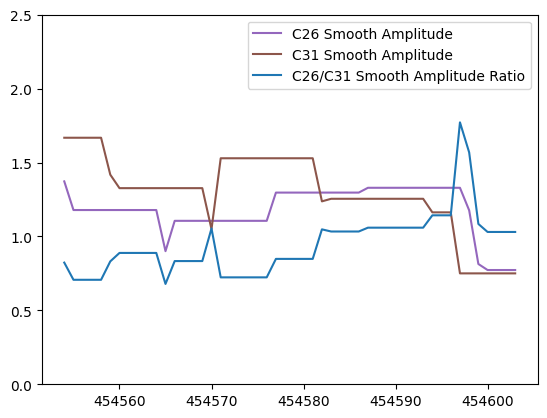

In [44]:
sequence_length = 50
gene_number = np.random.randint(576)
ingene_starting_point = np.random.randint(1005-sequence_length)

starting_point = starting_point = gene_number*1005 + ingene_starting_point

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C26 Amplitude", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C31_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C31 Amplitude", color="C2")

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         C26_smooth_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C26 Smooth Amplitude", color="C4")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         C31_smooth_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C31 Smooth Amplitude", color="C5")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_C31_amp_ratio[range(starting_point, starting_point + sequence_length)], label="C26/C31 Amplitude Ratio")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         C26_C31_smooth_amp_ratio[range(starting_point, starting_point + sequence_length)], label="C26/C31 Smooth Amplitude Ratio")

plt.ylim((0, 2.5))
plt.legend()
plt.show()


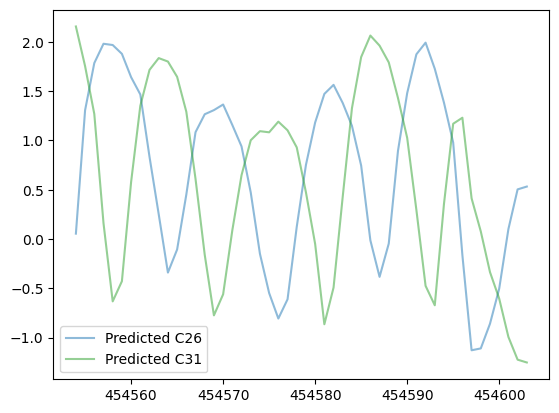

In [45]:
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_tiling["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=0.5)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_tiling["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=0.5)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C26"][range(starting_point, starting_point + sequence_length)], label="Smooth C26", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C31"][range(starting_point, starting_point + sequence_length)], label="Smooth C31", color="C2")

plt.legend()
plt.show()

In [65]:
print(np.mean(C26_C31_amp_ratio), np.nanmean(C26_C31_smooth_amp_ratio))

0.8734918549080191 0.8530311611193313


In [66]:
print(np.std(C26_C31_amp_ratio), np.nanstd(C26_C31_smooth_amp_ratio))

0.3193177048900596 0.320093460593092
